# Viðhorfsgreining á Íslenskum texta með Naive Bayes

Náð var í gagnasett 50 þúsund gagnrýnum, sem var vélþýtt með Miðeind og Google Translate




In [35]:
import pandas as pd
import numpy as np
from src import process
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Icelandic text normalization that will lowercase, lemmatize, remove stopwords and tokenize

#data = pd.read_csv("IMDB-Dataset-GoogleTranslate-Processed.csv")
#data = pd.read_csv("IMDB-Dataset.csv")



#tn = process.TextNormalizer()
#data['review'] = data['review'].apply(tn.process)
#data.to_csv("IMDB-Dataset-MideindTranslate-Processed.csv", encoding="utf-8")




In [37]:
# Using occurences of words in a bag of words

data = pd.read_csv("IMDB-Dataset-GoogleTranslate-Processed.csv")

def cv(data):
    count_vectorizer = CountVectorizer(max_features=1200)
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

list_corpus = data["review"].tolist()
list_labels = data["sentiment"].tolist()


X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=42)


X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)


# Create Naive Bayes Classifiers
mnb = MultinomialNB()
mnb.fit(X_train_counts, y_train)
y_pred_mnb = mnb.predict(X_test_counts)
print("Multinomial", accuracy_score(y_test, y_pred_mnb))
y_pred_clf = clf.predict(X_test_counts)
print("Logistic Regression", accuracy_score(y_test, y_pred_clf))


def test(texts):
    X_new_counts = count_vectorizer.transform(texts)
    return mnb.predict(X_new_counts)
   

print(test(["Satt að segja fannst mér þessi mynd ekki vera mjög skemmtileg", 
            "Mér fannst þessi mynd geggjuð", 
            "Mér fannst þessi mynd mjög skemmtileg",
            "Ég var skellihlæjandi allan tíman því myndin var svo fyndin"]))



# 82%

Multinomial 0.8345
Logistic Regression 0.8558
['negative' 'positive' 'positive' 'negative']


In [32]:
mnb.classes_.shape[0]

2

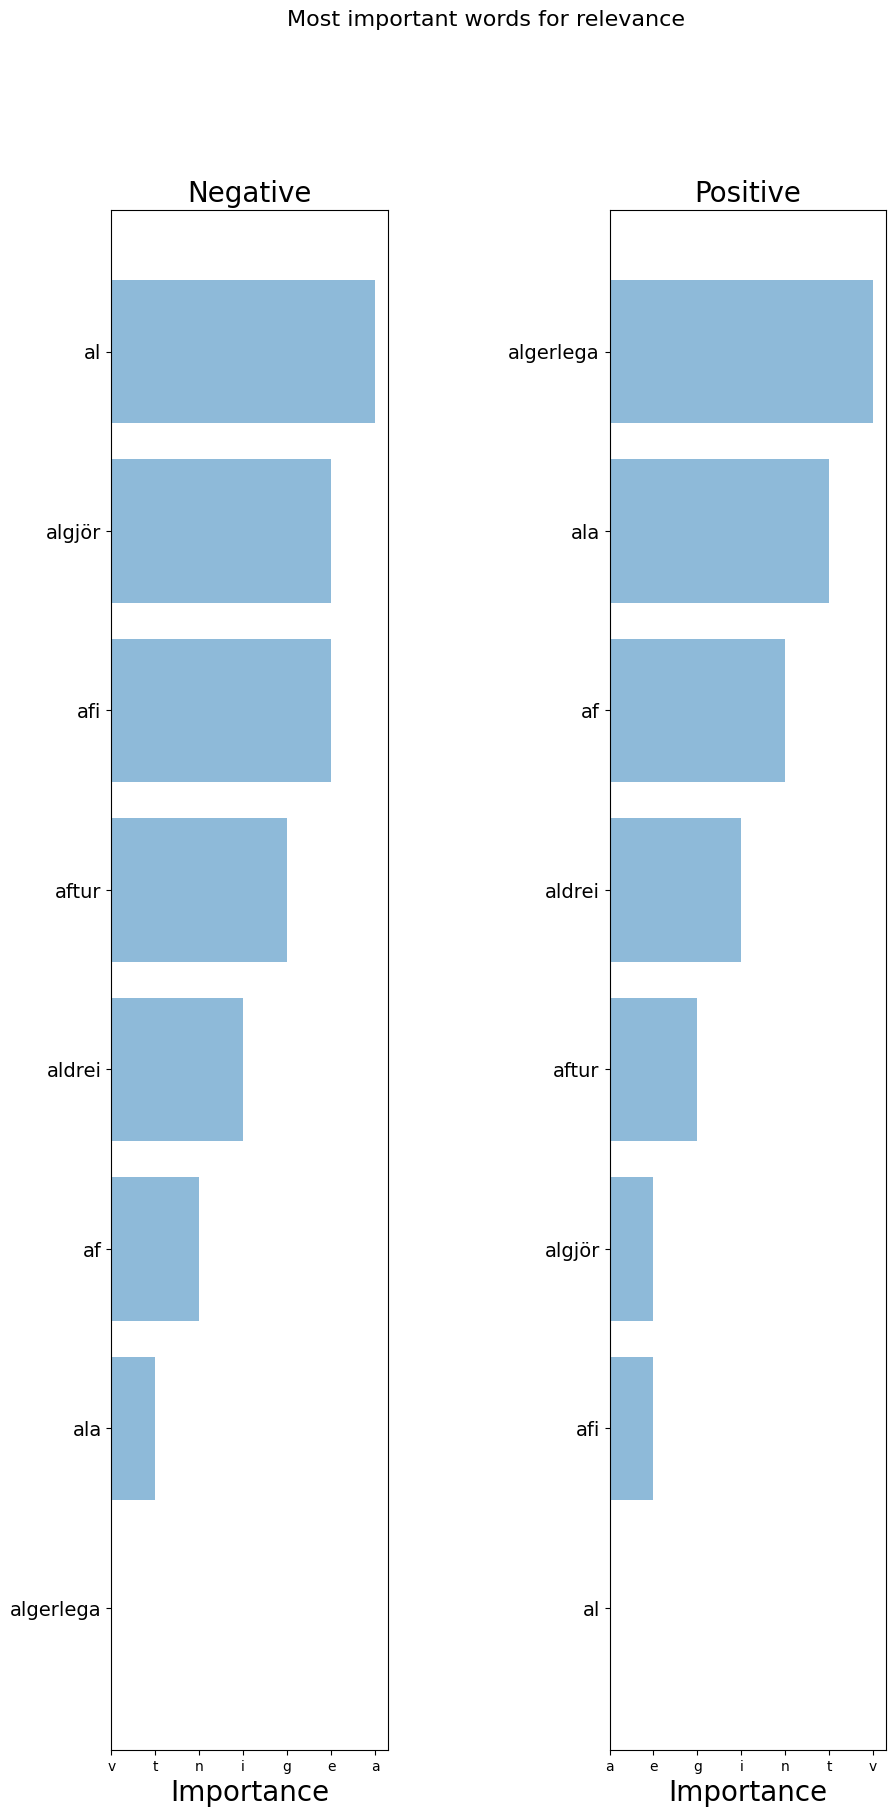

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 20))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Negative', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Positive', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

    
importance = get_most_important_features(count_vectorizer, clf, 100)

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

In [24]:
# Term Freqencies
tf_transformer = TfidfTransformer(use_idf=False)



['negative' 'positive' 'positive' 'negative']


In [37]:
reviews, sentiments = data["review"], data["sentiment"]
total_positive, total_negative = sentiments.value_counts()["positive"], sentiments.value_counts()["negative"]
print(len(reviews), len(sentiment), total_positive, total_negative)

50000 2 25000 25000


In [38]:
def sentiment_feature(txt):
    return {'sentiment': txt}

featureset = [(sentiment_feature(sentiment), review) for (review, sentiment) in zip(reviews, sentiments)]
featureset[0:4]

[({'sentiment': 'negative'},
  "Hvattur af jákvæðum ummælum um þessa mynd hérna, hlakkaði ég til að horfa á þessa mynd. Slæm mistök. Ég hef séð 950+ kvikmyndir og þetta er sannarlega ein af þeim verstu - hún er hræðileg á næstum öllum sviðum: klipping, skeið, söguþráður, 'leikur', hljóðrás (eina lag myndarinnar - lame country lag - er spilað nr. minna en fjórum sinnum). Myndin lítur ódýr og viðbjóðslega út og er leiðinleg í öfgakennd. Sjaldan hef ég verið jafn ánægður með að sjá lokaeintök kvikmyndar. Það eina sem kemur í veg fyrir að ég gefi þessu 1-einkunn er Harvey Keitel - þó að þetta sé langt frá hans besta frammistöðu virðist hann að minnsta kosti vera að leggja sig svolítið fram. Einn fyrir Keitel þráhyggju."),
 ({'sentiment': 'positive'},
  'Einn hinna gagnrýnenda hefur nefnt að eftir að hafa horft aðeins á 1 Oz þátt þá verðurðu hrifinn. Þeir hafa rétt fyrir sér, þar sem þetta er nákvæmlega það sem gerðist hjá mér. Það fyrsta sem sló mig við Oz var grimmd hans og óbilandi ofbel

In [36]:
train_set, test_set = featureset[0:40000], featureset[40000:50000]
import nltk
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.0
